CONTENT:
1. Logistic Regression Coefficients
2. Linear Regression Coefficients
3. Regression Coefficients are affected by regularisation
4. Feature selection with linear models, review

## 1. Logistic Regression Coefficients


__About linear regression__:

Linear regression predicts a quantitative response Y on the basis of predictor variables X1, X2, ... Xn. It assumes that there is a linear relationship between X(s) and Y. Mathematically, we write this linear relationship as Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.

The magnitude of the coefficients is directly influenced by the scale of the features.

Linear Regression makes the following assumptions over the predictor variables X:
- Linear relationship with the outcome Y
- Multivariate normality (X should follow a Gaussian distribution)
- No or little multicollinearity (Xs should not be linearly related to one another)
- Homoscedasticity (variance should be the same)

__Logistic Regression Coefficients (LRC)__:

The bigger feature's LRC, the bigger influence the feature has.

Regularisation (setting a penalty) plays a great role in interpritaion of the results. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [2]:
# load dataset
data = pd.read_csv('../dataset_2.csv')
data.shape

(50000, 109)

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [6]:
# scale the variables

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
# here, select the Ridge Penalty (l2)

# to avoid regularisation at all, I set the parameter C really high (1000)
# which is basically like fitting a non-regularised logistic regression

sel_ = SelectFromModel(
    LogisticRegression(C=1000, penalty='l2', max_iter=300, random_state=10))

sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1000, max_iter=300,
                                             random_state=10))

In [8]:
# this command booleans those features that were kept.

# sklearn will select those features which coefficients are greater
# than the mean of all the coefficients.

sel_.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False])

In [9]:
# variable names and summing them

selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

33

In [10]:
# the coefficients of the variables
# for the linear regression (for all the 108 variables)

sel_.estimator_.coef_

array([[ 1.15390359e-02, -1.34251730e-02,  1.09077735e-01,
         2.64271673e-02,  4.34278644e-02, -2.46295712e-02,
        -3.34301512e-02, -6.20454077e-03,  2.32600830e-02,
        -9.79867524e-03,  7.97784395e-02,  5.27962486e-02,
        -3.75207807e-02,  1.92595999e-02, -3.86183999e-02,
         2.33569675e-02,  1.36969270e-02,  5.42472390e-02,
         1.29537820e-02,  1.54174438e-02,  1.41846277e-01,
         2.45088969e-02, -1.28655137e-01,  1.26610907e-01,
         1.43951854e-02,  6.34709293e-02,  2.75619795e-02,
        -8.91099019e-04, -1.41234522e-02, -1.44271004e-02,
         6.83795648e-03, -1.86109414e-01, -1.00626292e-01,
         3.26617210e-02,  1.18441042e-02,  4.34532887e-02,
         1.95873960e-02,  4.49187346e-02,  7.91025291e-02,
         7.02362889e-02, -3.49568827e-03, -2.27095824e-03,
        -5.34586448e-02,  5.64090376e-02,  3.63961804e-03,
         3.05420268e-02,  4.87704374e-03,  4.28485038e-01,
         2.16415341e-02,  7.34214965e-02,  1.49931887e-0

In [11]:
# calculate the mean

sel_.estimator_.coef_.mean()

0.011978664329410435

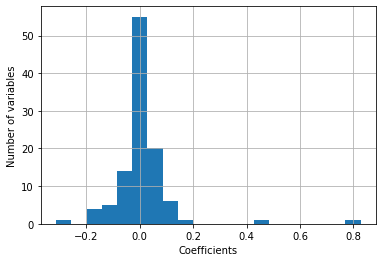

In [12]:
# plot the distribution of coefficients

pd.Series(sel_.estimator_.coef_.ravel()).hist(bins=20)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

As expected, some coefficients are positive and some are negative, suggesting that some features are negatively associated with the outcome (the more of the feature the less of the outcome) and viceversa.

However, the absolute value of the coefficients inform about the importance of the feature on the outcome, and not the sign. Therefore, the feature selection is done filtering on absolute values of coefficients.

In [13]:
# recalculate the mean using the absolute values instead
# as the feature importance is informed by the absolute value of
# the coefficient, and not the sign

np.abs(sel_.estimator_.coef_).mean()

0.05692122431362038

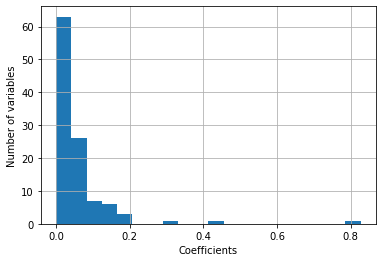

In [14]:
# plot the histogram of absolute coefficients

pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=20)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

And now, the  number of selected features to be compare with the number of features which coefficient is above the mean coefficient, to make sure we understand the output of SelectFromModel.

In [15]:
print('total features: {}'.format((X_train.shape[1])))

print('selected features by the algorithm: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(sel_.estimator_.coef_) > np.abs(
                sel_.estimator_.coef_).mean())))

total features: 108
selected features by the algorithm: 33
features with coefficients greater than the mean coefficient: 33


Therefore, we see how select from model works. It will select all the coefficients which absolute values are greater than the mean.

## 2. Linear Regression Coefficients
In this notebook, the feature selection is repeated based of variable coefficients returned by a linear model.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# load dataset
data = pd.read_csv('../houseprice.csv')
data.shape

(1460, 81)

In practice, feature selection should be done after data pre-processing, so ideally, all the categorical variables are encoded into numbers, and then you can assess how deterministic they are of the target.

Here, as this is just a demo noteboke and for simplicity sake,  I will use only numerical variables.

In [18]:
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [19]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [20]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [21]:
# the features in the house dataset are in different scales

# so train a scaler to scale them

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

To do: train a Linear regression model and select features with higher coefficients.

The LinearRegression object from sklearn is a non-regularised linear method. It fits by matrix  multiplication and not gradient descent, therefore, there is no need to specify penalty and other parameters

In [22]:
sel_ = SelectFromModel(LinearRegression())

sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LinearRegression())

In [23]:
#  count the number of variables selected
selected_feat = X_train.columns[(sel_.get_support())]

len(selected_feat)

7

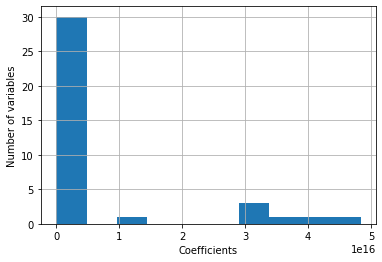

In [24]:
# plot the histogram of absolute coefficients

pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=10)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

And now, the number of selected features to be compare with the number of features which coefficient is above the mean coefficient, to make sure we understand the output of SelectFromModel.

In [25]:
print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(sel_.estimator_.coef_) > np.abs(
                sel_.estimator_.coef_).mean())))

total features: 37
selected features: 7
features with coefficients greater than the mean coefficient: 7


Same as before, it selects those features which coefficient are greater than the mean of all feature coefficients.

## 3. Regression Coefficients are affected by regularisation

As it was mentioned previously, regularisation applies a penalty on the coefficients, in order to reduce their influence and create models that generalise better. This is very good to improve  model performance. However, it masks the true relationship between the predictor X and the outcome Y. 

In [26]:
# load dataset
data = pd.read_csv('../dataset_2.csv')
data.shape

(50000, 109)

In [27]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [28]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

To do: fit a few (say 4) logistic regression models with decreasing values for the penalty of the regularisation.

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)

# store the coefficients of the variables
# fitted for each different model
coefs_df = []

# train 4 different models with regularization
penalties = [0.00005, 0.0005, 0.005, 0.05, 0.5]

for c in penalties:   
    
    logit = LogisticRegression(C=c, penalty='l2', random_state=10, max_iter=300)
    logit.fit(scaler.transform(X_train), y_train)
    
    # store the coefficients of the variables in a list
    coefs_df.append(pd.Series(logit.coef_.ravel()))

In [34]:
# create a dataframe with the coefficients for all
# the variables for the 4 different logistic regression models

coefs = pd.concat(coefs_df, axis=1)
coefs.columns = penalties
coefs.index = X_train.columns
coefs.head()

,0.00005,0.00050,0.00500,0.05000,0.50000
var_1,0.002746,0.005288,0.007366,0.011095,0.011676
var_2,-0.005650,-0.010763,-0.012708,-0.012865,-0.013310
var_3,0.000971,-0.002668,0.007178,0.061188,0.101084
var_4,0.001327,-0.002046,0.001087,0.020369,0.025926
var_5,0.002923,0.008070,0.025891,0.039422,0.042846


In [36]:
# apply log scale to the penalties to simplify comparison

coefs.columns = np.log(penalties)
coefs.head()

,-9.903488,-7.600902,-5.298317,-2.995732,-0.693147
var_1,0.002746,0.005288,0.007366,0.011095,0.011676
var_2,-0.005650,-0.010763,-0.012708,-0.012865,-0.013310
var_3,0.000971,-0.002668,0.007178,0.061188,0.101084
var_4,0.001327,-0.002046,0.001087,0.020369,0.025926
var_5,0.002923,0.008070,0.025891,0.039422,0.042846


Text(0.5, 1.0, 'Coefficient value vs penalty. Each line corresponds to one variable')

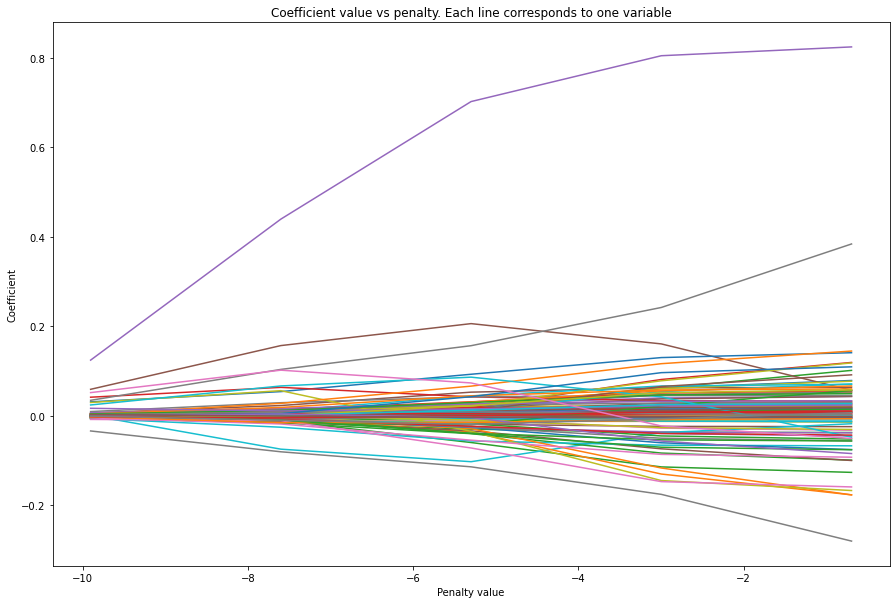

In [37]:
# plot the change in coefficients with the penalty
coefs.T.plot(figsize=(15,10), legend=False)
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty. Each line corresponds to one variable')

Text(0.5, 1.0, 'Coefficient value vs penalty')

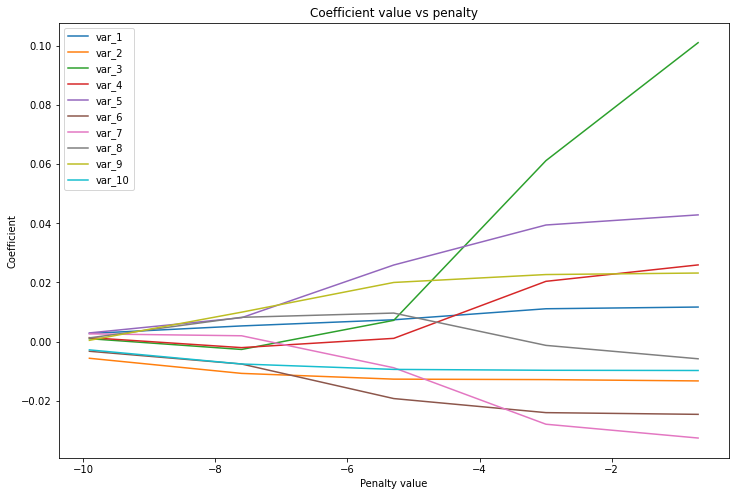

In [38]:
# plot only the first 10 features for better visualisation

temp = coefs.head(10)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

The relation among the coefficients is complex. Some features show bigger coefficients than others without regularisation, but when the penalty increases this relationship changes.

Some other features are very important (show big coefficients) without regularisation, but with regularization their importance is similar to that of other features.

While this is not crucial to selet features, this is actually quite important when the aim is to understand the true relationship of a variable with the target.

Text(0.5, 1.0, 'Coefficient value vs penalty')

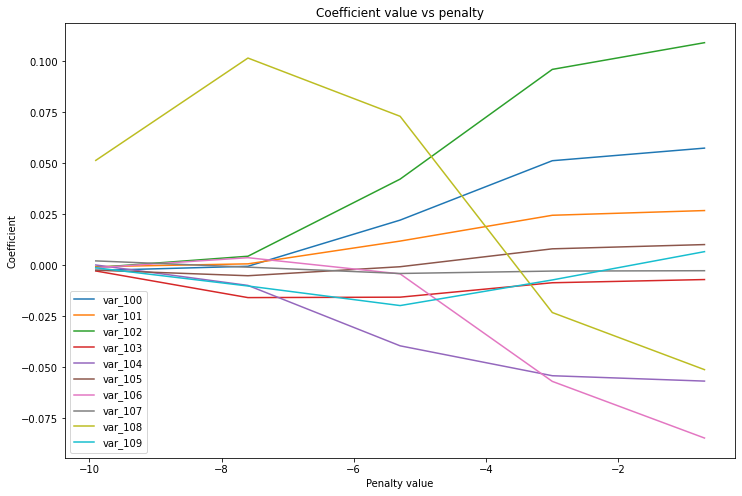

In [10]:
# plot another 10 features for visualisation
temp = coefs.tail(10)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

Same as before, the relationship between features, as inferred from the coefficients, changes depending on the level of regularisation.

## 4. Feature selection with linear models, review

In [39]:
from sklearn.feature_selection import VarianceThreshold

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score

In [40]:
data = pd.read_csv('../dataset_1.csv')
data.shape

(50000, 301)

In [41]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [42]:
# keep a copy of the dataset with all the variables
# to compare the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

### Remove constant features

In [43]:
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 266), (15000, 266))

### Remove quasi-constant features

In [44]:
# find features with low variance
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)  

sum(sel.get_support()) 

215

In [45]:
features_to_keep = X_train.columns[sel.get_support()]

In [46]:
# remove the features
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 215), (15000, 215))

In [47]:
# sklearn transformations lead to numpy arrays
# here, it to be transformed back to dataframes

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

### Remove duplicated features

In [48]:
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    
    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

10

In [49]:
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 205), (15000, 205))

In [50]:
# keep a copy of the dataset except constant, quasi-constant and duplicated variables

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

### Remove correlated features

In [51]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  93


In [52]:
# remove correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [53]:
# keep a copy of the dataset without correlated features
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

### Select features by the regression coefficients

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [55]:
# use regularisation by setting a low value of C

sel_ = SelectFromModel(
    LogisticRegression(C=0.0005, random_state=10, max_iter=1000, penalty='l2'))

sel_.fit(scaler.transform(X_train), y_train)

# select features where coefficient is above the mean
# coefficient value and parse again as dataframe
X_train_coef = pd.DataFrame(sel_.transform(X_train))
X_test_coef = pd.DataFrame(sel_.transform(X_test))

# add the columns name
X_train_coef.columns = X_train.columns[(sel_.get_support())]
X_test_coef.columns = X_train.columns[(sel_.get_support())]

In [56]:
X_train_coef.shape, X_test_coef.shape

((35000, 28), (15000, 28))

### Compare the performance in machine learning algorithms

In [57]:
# a function to train a logistic regression 
# and compare its performance in the train and test sets

def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    logit = LogisticRegression(C=0.0005, random_state=10, max_iter=10000, penalty='l2')
    logit.fit(scaler.transform(X_train), y_train)
    
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [58]:
# original dataset - all variables
run_logistic(X_train_original,
             X_test_original,
             y_train,
             y_test)

Train set
Logistic Regression roc-auc: 0.7844213790053062
Test set
Logistic Regression roc-auc: 0.7825685631204591


In [59]:
# filter methods - basic
run_logistic(X_train_basic_filter,
             X_test_basic_filter,
             y_train,
             y_test)

Train set
Logistic Regression roc-auc: 0.7841215084117658
Test set
Logistic Regression roc-auc: 0.7823687162836174


In [60]:
# filter methods - correlation
run_logistic(X_train_corr,
             X_test_corr,
             y_train,
             y_test)

Train set
Logistic Regression roc-auc: 0.7775268841746482
Test set
Logistic Regression roc-auc: 0.7760748408318285


In [61]:
# embedded methods - Logistic regression coefficients
run_logistic(X_train_coef,
             X_test_coef,
             y_train,
             y_test)

Train set
Logistic Regression roc-auc: 0.7754621344319395
Test set
Logistic Regression roc-auc: 0.7719805239762513


The model with 28 features performs almost as well as a model trained with all the 215 variables!